# Non-Local Means Denoising

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

In [ ]:
img = cv2.imread('/content/78765d5e-00000.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

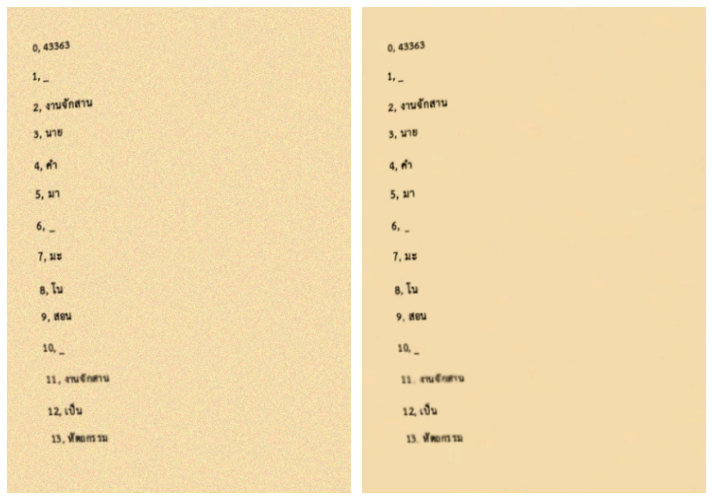

In [ ]:
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

show_img_compar(img, dst)

# Hightest Pixel Frequency

In [ ]:
print(dst.shape)
dst

(594, 420, 3)


array([[[243, 218, 175],
        [243, 218, 175],
        [243, 218, 175],
        ...,
        [247, 220, 169],
        [247, 220, 169],
        [247, 220, 169]],

       [[243, 218, 175],
        [243, 218, 175],
        [243, 218, 175],
        ...,
        [247, 220, 169],
        [247, 220, 169],
        [247, 220, 169]],

       [[243, 218, 175],
        [243, 218, 175],
        [243, 218, 175],
        ...,
        [247, 220, 169],
        [247, 220, 169],
        [247, 220, 169]],

       ...,

       [[243, 219, 171],
        [243, 219, 171],
        [243, 219, 171],
        ...,
        [243, 219, 171],
        [243, 219, 171],
        [243, 219, 171]],

       [[247, 220, 169],
        [247, 220, 169],
        [247, 220, 169],
        ...,
        [243, 219, 171],
        [243, 219, 171],
        [243, 219, 171]],

       [[247, 220, 169],
        [247, 220, 169],
        [247, 220, 169],
        ...,
        [243, 219, 171],
        [243, 219, 171],
        [243, 219, 171]]

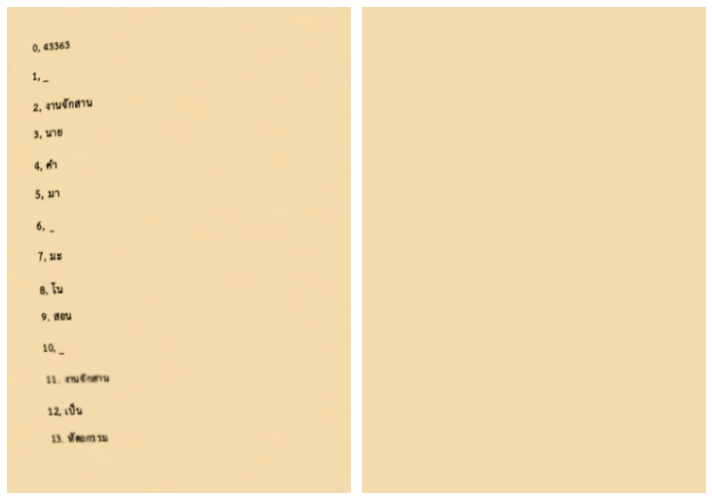

In [ ]:
img_temp = dst.copy()
unique, counts = np.unique(img_temp.reshape(-1, 3), axis=0, return_counts=True)
img_temp[:,:,0], img_temp[:,:,1], img_temp[:,:,2] = unique[np.argmax(counts)]

show_img_compar(dst, img_temp)

# Pick BG Pixel Value and Threshold

In [ ]:
r,g,b = (dst[50,50])

In [ ]:
print(r, g, b)

214 192 148


In [ ]:
rgb = [r, g, b]
thresh = 22

minBGR = np.array([rgb[0] - thresh, rgb[1] - thresh, rgb[2] - thresh])
maxBGR = np.array([rgb[0] + thresh, rgb[1] + thresh, rgb[2] + thresh])

maskBGR = cv2.inRange(dst, minBGR, maxBGR)
resultBGR = cv2.bitwise_and(dst, dst, mask=maskBGR)

In [ ]:
ret,thresh1 = cv2.threshold(dst,150,255,cv2.THRESH_BINARY)

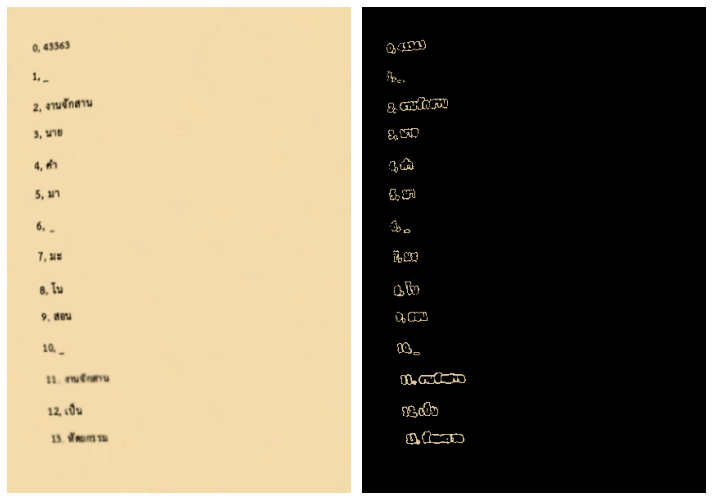

In [ ]:
show_img_compar(dst, resultBGR)

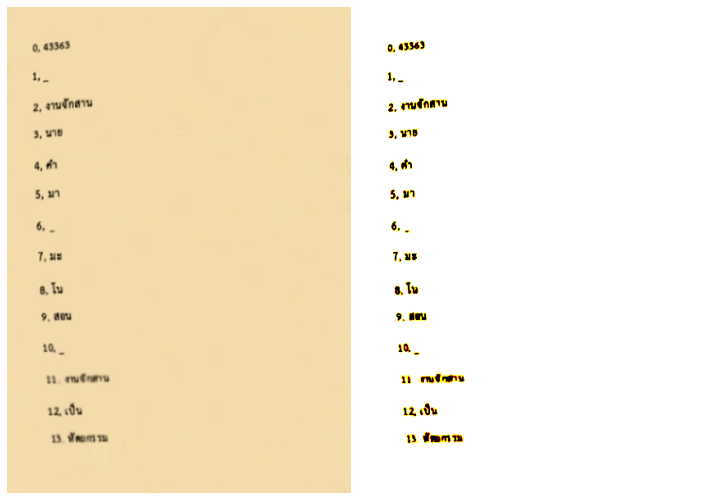

In [ ]:
show_img_compar(dst, thresh1)